<a href="https://colab.research.google.com/github/adeakinwe/ML-Google-Colab-Notes/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
fashion_mnsit = keras.datasets.fashion_mnist #dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnsit.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
#predict classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

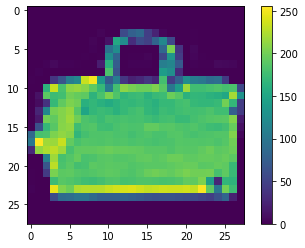

In [ ]:
#plotting
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#pre-processing
train_images = train_images / 255.0 #defaults to value btw 0 and 1
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #output layer
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4145 - accuracy: 0.8547


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('accuracy: ', test_acc)
print('loss: ', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.8371
accuracy:  0.8371000289916992
loss:  0.44889697432518005


In [ ]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 1s 4ms/step
[3.9926525e-07 1.9029206e-07 6.5007239e-06 8.8613860e-06 1.1189040e-05
 1.2638313e-01 1.4473288e-05 2.3651096e-01 3.9938143e-03 6.3307047e-01]


In [ ]:
print(class_names[np.argmax(predictions[5])])

Trouser


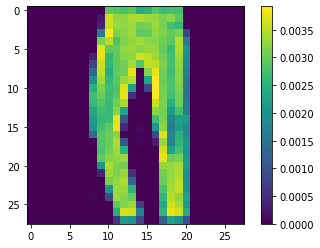

In [ ]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('Expected: ' + label)
  plt.xlabel('Guess: ' + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

Pick a number e
Please pick a valid number
Pick a number o
Please pick a valid number
Pick a number 0
1/1 [==============================] - 0s 26ms/step


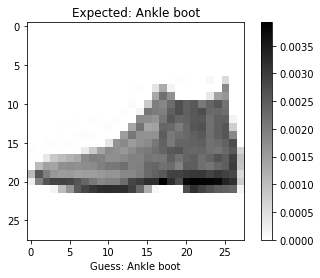

In [ ]:
def get_number():
  while True:
    num = input('Pick a number ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print('Please pick a valid number')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)